In [12]:
import numpy as np
import pandas as pd

In [13]:
data=pd.read_csv("indian-cities-dataset.csv")

In [14]:
data

,Origin,Destination,Distance
0,Agra,Delhi,240
1,Agra,Lucknow,334
2,Agra,Kanpur,277
3,Ahmedabad,Mumbai,526
4,Ahmedabad,Pune,663
...,...,...,...
78,Varanasi,Kolkata,683
79,Varanasi,Lucknow,312
80,Vishakhapatnam,Bhubaneswar,441
81,Vishakhapatnam,Hyderabad,618


# Graph Visualization

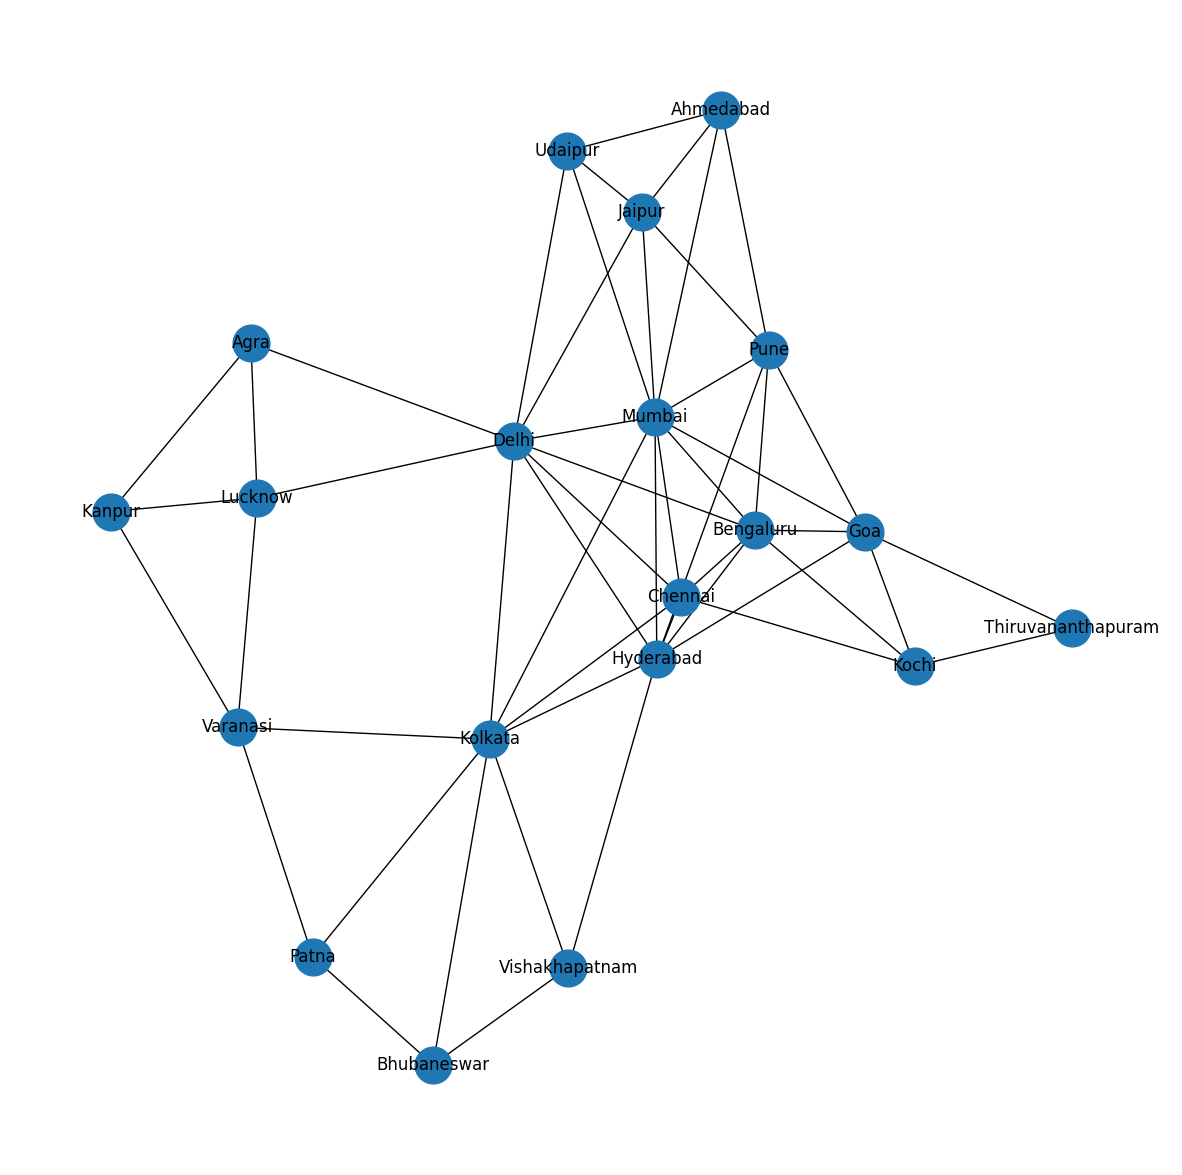

In [15]:
#Graph Visualization
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(data, 'Origin', 'Destination', ['Distance'])

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=700)

nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.show()

degree_dict = dict(G.degree(G.nodes()))
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)

#  A* search algorithm

In [20]:
#Cities display
cities_list=set()
for each in data['Origin']:
    cities_list.add(each)
    
for each in data['Destination']:
    cities_list.add(each)

def display_cities():
    print("List of cities")
    for each in cities_list:
        print(each)
    

In [21]:
import heapq as pq
import pandas as pd
import time


def astar(graph, start, goal):
    open_set = [(0, start)]
    came_from = {}
    g_score = {city: float('inf') for city in graph['Origin']}
    g_score = {city: float('inf') for city in graph['Destination']}
    g_score[start] = 0

    while open_set:
        current_score, current_city = pq.heappop(open_set)

        if current_city == goal:
            path = make_path(came_from, goal)
            return path,current_score

        for index, row in graph.iterrows():
            if row['Origin'] == current_city:
                neighbor = row['Destination']
                distance = row['Distance']
                tentative_g_score = g_score[current_city] + distance

                #f(n)=g(n)+h(n)
                if tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, goal)
                    pq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current_city

    return None,None

def make_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

def heuristic(city, goal):
    return 0

display_cities()

start=input("Enter start location: ").strip()
end=input("Enter destination : ").strip()

start_time=time.time()
path,distance= astar(data, start, end)
end_time=time.time()
ex=end_time-start_time

if path:
    print(f"Shortest path from {start} to {end}: {' -> '.join(path)}")
    print(f"Total distance : {distance}km")
    print(f'Execution time: {ex}')
else:
    print(f"No path found from {start} to {end}")


List of cities
Kolkata
Bengaluru
Mumbai
Kochi
Chennai
Delhi
Jaipur
Bhubaneswar
Vishakhapatnam
Goa
Ahmedabad
Agra
Lucknow
Thiruvananthapuram
Patna
Kanpur
Pune
Udaipur
Hyderabad
Varanasi
Enter start location: Chennai
Enter destination : Delhi
Shortest path from Chennai to Delhi: Chennai -> Hyderabad -> Delhi
Total distance : 2209km
Execution time: 0.1854417324066162


# Uniform Cost Search

In [7]:
#Adjacency list

cities_data={}
each_data={}
for i in range(len(data)):
    row=data.iloc[i]
    cities_data[row['Origin']]={}
    cities_data[row['Destination']]={}

for i in range(len(data)):
    row=data.iloc[i]
    cities_data[row['Origin']].update({row['Destination']:row['Distance']})
print(cities_data)

{'Agra': {'Delhi': 240, 'Lucknow': 334, 'Kanpur': 277}, 'Delhi': {'Jaipur': 307, 'Agra': 243, 'Lucknow': 548, 'Chennai': 2208, 'Bengaluru': 2174, 'Mumbai': 1452, 'Hyderabad': 1582}, 'Lucknow': {'Delhi': 553, 'Agra': 333, 'Kanpur': 89}, 'Kanpur': {'Agra': 301, 'Lucknow': 115, 'Varanasi': 328}, 'Ahmedabad': {'Mumbai': 526, 'Pune': 663, 'Jaipur': 660, 'Udaipur': 258}, 'Mumbai': {'Pune': 148, 'Ahmedabad': 526, 'Delhi': 1453, 'Hyderabad': 713, 'Bengaluru': 984, 'Kolkata': 1886, 'Chennai': 1338}, 'Pune': {'Mumbai': 150, 'Ahmedabad': 660, 'Hyderabad': 560, 'Bengaluru': 842}, 'Jaipur': {'Ahmedabad': 659, 'Udaipur': 397, 'Delhi': 308, 'Mumbai': 1170, 'Pune': 1191}, 'Udaipur': {'Ahmedabad': 257, 'Jaipur': 397, 'Mumbai': 767, 'Delhi': 688}, 'Bengaluru': {'Pune': 839, 'Hyderabad': 576, 'Chennai': 346, 'Goa': 562}, 'Hyderabad': {'Pune': 562, 'Bengaluru': 576, 'Chennai': 627, 'Goa': 674, 'Mumbai': 708, 'Delhi': 1583, 'Kolkata': 1489}, 'Chennai': {'Hyderabad': 626, 'Bengaluru': 345, 'Kochi': 690, 'Mu

In [9]:
import heapq
import time

def ucs(graph, start, goal):
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        cost, current_node, path = heapq.heappop(priority_queue)

        if current_node not in visited:
            path = path + [current_node]
            visited.add(current_node)

            if current_node == goal:
                return path, cost

            for neighbor, neighbor_cost in graph[current_node].items():
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (cost + neighbor_cost, neighbor, path))

    return None

display_cities()

start=input('Enter the start location: ').strip()
goal=input('Enter the destination: ').strip()

start_time=time.time()
result = ucs(cities_data,start,goal)
end_time=time.time()
ex=end_time-start_time

if result:
    path, cost = result
    print(f"Shortest path from {start} to {goal}: {' -> '.join(path)}")
    print(f"Total distance: {cost}km")
else:
    print(f"No path from {start} to {goal}")


Kolkata
Bengaluru
Mumbai
Kochi
Chennai
Delhi
Jaipur
Bhubaneswar
Vishakhapatnam
Goa
Ahmedabad
Agra
Lucknow
Thiruvananthapuram
Patna
Kanpur
Pune
Udaipur
Hyderabad
Varanasi
Enter the start location: Agra
Enter the destination: Thiruvananthapuram
Shortest path from Agra to Thiruvananthapuram: Agra -> Delhi -> Chennai -> Kochi -> Thiruvananthapuram
Total distance: 3344km
